In [1]:
%ls

common_sites_V3.csv            randV1_site_prediction.csv
ireland_sites_V3.csv           site plotting.ipynb
nonsite random sampling.ipynb  site prediction.ipynb
randV1_ireland_sites_V3.csv    svm_model.ipynb
randV1_nonsites_V3.csv


<h3>
Plotting points from sites.csv
<br>
<br>
Plotting heatmap from ireland_sites.csv
</h3>

Import data

In [15]:
import os
import csv
import numpy  as np
import pandas as pd

import matplotlib
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data_folder = ''
sites_file = 'common_sites_V3.csv'
sites = os.path.join(data_folder, sites_file)
sites_df = pd.read_csv(sites, sep=',', error_bad_lines=False)

height_data_folder = ''
nonsites_file = 'randV1_site_prediction.csv'
nonsites = os.path.join(height_data_folder, nonsites_file)
nonsites_df = pd.read_csv(nonsites, sep=',', error_bad_lines=False)
nonsites_df = nonsites_df.where(nonsites_df['prediction'] == 1)


Preprocess sites.csv Data

In [6]:
country1 = ''
country2 = 'Ireland'

country_df = sites_df.where((sites_df['country'] == country1) | (sites_df['country'] == country2))
# country_df = df
# set min and max latitude and longitude
minlat = country_df['latitude'].min()
maxlat = country_df['latitude'].max()
minlon = country_df['longitude'].min()
maxlon = country_df['longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

minlat -= (difflat / 10) * 2
maxlat += (difflat / 10) * 2
minlon -= (difflon / 10) * 2
maxlon += (difflon / 10) * 2

Set Boundaries of Map

Text(0,0.5,'Latitude\n\n\n')

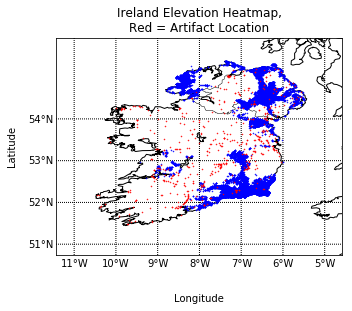

In [9]:
# Plot the geological features
m = Basemap(projection='cyl',
            llcrnrlat=minlat,
            urcrnrlat=maxlat,     
            llcrnrlon=minlon,
            urcrnrlon=maxlon,
            resolution='i')

m.drawparallels(np.arange(int(minlat),int(maxlat),1),labels=[1,0,0,0])
m.drawmeridians(np.arange(int(minlon),int(maxlon),1),labels=[0,0,0,1])
# m.fillcontinents(color='None')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.drawrivers()
# m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
# m.drawmapboundary(fill_color='#FFFFFF')
# m.bluemarble()

# Plot Ireland Heatmap
# column = 'lake'

# heightlat = np.array(height_df['Latitude'].tolist())
# heightlon = np.array(height_df['Longitude'].tolist())
# z = np.array(height_df[column].tolist())
# x, y = m(heightlon, heightlat)
# plt.scatter(x, y, c=z, s=.1)
# plt.colorbar(label='height (m)')

# Plot randV1_site_prediction.csv scatterplots
lat = np.array(nonsites_df['latitude'].tolist())
lon = np.array(nonsites_df['longitude'].tolist())
x, y = m(lon, lat)
m.plot(x, y, 'b.', markersize=1)

# Plot common_sites_V3.csv scatterplots
lat = np.array(country_df['latitude'].tolist())
lon = np.array(country_df['longitude'].tolist())
x, y = m(lon, lat)
m.plot(x, y, 'r.', markersize=1)

# Plot labels
plt.title('Ireland Elevation Heatmap,\nRed = Artifact Location')
plt.xlabel('\n\n\nLongitude')
plt.ylabel('Latitude\n\n\n')

In [10]:
plt.show()

In [14]:
%%writefile mapPrediction.py
def mapPredictedFromDF(site_df, nonsite_df):
    """Plot points of Ireland
    Parameters
    -----------
        site_df : pandas.DataFrame
            dataframe of the sites
        nonsite_df : pandas.DataFrame
            dataframe of the nonsites
            
    Returns
    --------
        None
    """
    import os
    import csv
    import numpy  as np
    import pandas as pd

    import matplotlib

    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt

    sites_df = site_df
    nonsites_df = nonsite_df.where(nonsite_df['prediction'] == 1)

    # plot only the country of interest
    country_df = sites_df.where((sites_df['country'] == 'Ireland'))
    minlat = country_df['latitude'].min()
    maxlat = country_df['latitude'].max()
    minlon = country_df['longitude'].min()
    maxlon = country_df['longitude'].max()
    difflat = maxlat - minlat
    difflon = maxlon - minlon
    minlat -= (difflat / 10) * 2
    maxlat += (difflat / 10) * 2
    minlon -= (difflon / 10) * 2
    maxlon += (difflon / 10) * 2

    
    # Plot the geological features
    m = Basemap(projection='cyl',
                llcrnrlat=minlat,
                urcrnrlat=maxlat,     
                llcrnrlon=minlon,
                urcrnrlon=maxlon,
                resolution='i')

    m.drawparallels(np.arange(int(minlat),int(maxlat),1),labels=[1,0,0,0])
    m.drawmeridians(np.arange(int(minlon),int(maxlon),1),labels=[0,0,0,1])
    # m.fillcontinents(color='None')

    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    # m.drawrivers()
    # m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
    # m.drawmapboundary(fill_color='#FFFFFF')
    # m.bluemarble()

    # Plot ...site_prediction.csv scatterplots
    lat = np.array(nonsites_df['latitude'].tolist())
    lon = np.array(nonsites_df['longitude'].tolist())
    x, y = m(lon, lat)
    m.plot(x, y, 'b.', markersize=1)

    # Plot common_sites_V3.csv scatterplots
    lat = np.array(country_df['latitude'].tolist())
    lon = np.array(country_df['longitude'].tolist())
    x, y = m(lon, lat)
    m.plot(x, y, 'r.', markersize=1)

    # Plot labels
    plt.title('Ireland Site Prediction,\nRed=Discovered Sites\nBlue=Predicted Sites')
    plt.xlabel('\n\n\nLongitude')
    plt.ylabel('Latitude\n\n\n')
    
    plt.show()
    return


def mapPredictedFromCSV(site_file, nonsite_file):
    """Plot points of Ireland
    Parameters
    -----------
        sites_file : str
            string of site csv
        nonsite_file : string
            string of nonsite csv
            
    Returns
    --------
        None
    """
    import os
    import csv
    import numpy  as np
    import pandas as pd

    import matplotlib

    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt

    sites_df = pd.read_csv(site, sep=',', error_bad_lines=False)

    nonsites_df = pd.read_csv(nonsite_file, sep=',', error_bad_lines=False)
    nonsites_df = nonsites_df.where(nonsites_df['prediction'] == 1)

    # plot only the country of interest
    country_df = sites_df.where((sites_df['country'] == 'Ireland'))
    minlat = country_df['latitude'].min()
    maxlat = country_df['latitude'].max()
    minlon = country_df['longitude'].min()
    maxlon = country_df['longitude'].max()
    difflat = maxlat - minlat
    difflon = maxlon - minlon
    minlat -= (difflat / 10) * 2
    maxlat += (difflat / 10) * 2
    minlon -= (difflon / 10) * 2
    maxlon += (difflon / 10) * 2

    
    # Plot the geological features
    m = Basemap(projection='cyl',
                llcrnrlat=minlat,
                urcrnrlat=maxlat,     
                llcrnrlon=minlon,
                urcrnrlon=maxlon,
                resolution='i')

    m.drawparallels(np.arange(int(minlat),int(maxlat),1),labels=[1,0,0,0])
    m.drawmeridians(np.arange(int(minlon),int(maxlon),1),labels=[0,0,0,1])
    # m.fillcontinents(color='None')

    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    # m.drawrivers()
    # m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
    # m.drawmapboundary(fill_color='#FFFFFF')
    # m.bluemarble()

    # Plot ...site_prediction.csv scatterplots
    lat = np.array(nonsites_df['latitude'].tolist())
    lon = np.array(nonsites_df['longitude'].tolist())
    x, y = m(lon, lat)
    m.plot(x, y, 'b.', markersize=1)

    # Plot common_sites_V3.csv scatterplots
    lat = np.array(country_df['latitude'].tolist())
    lon = np.array(country_df['longitude'].tolist())
    x, y = m(lon, lat)
    m.plot(x, y, 'r.', markersize=1)

    # Plot labels
    plt.title('Ireland Site Prediction,\nRed=Discovered Sites\nBlue=Predicted Sites')
    plt.xlabel('\n\n\nLongitude')
    plt.ylabel('Latitude\n\n\n')
    
    plt.show()
    return


Overwriting mapPrediction.py
